In [14]:
import numpy as np

def linear_one_peak_str_no_dip(m, fringe_prob=0.04):
    """
    Linear one-peak distribution for m slots.
    - Monotonic, symmetric, no probability below fringe_prob
    - Single peak (or twin center for even m)
    - Fringes = fringe_prob
    - Returns a string [p1, p2, ..., pm]
    """
    if m == 1:
        probs = np.array([1.0])
    elif m == 2:
        probs = np.array([0.5, 0.5])
    else:
        probs = np.zeros(m)
        probs[0] = probs[-1] = fringe_prob
        n = m - 2  # middle slots
        remaining = 1 - 2 * fringe_prob

        # Assign initial linear weights: 1,2,... for half
        if n % 2 == 1:
            # Odd middle slots → single center
            peak_idx = n // 2
            half_weights = np.arange(1, peak_idx + 2)
            full_weights = np.concatenate([half_weights[:-1], half_weights[::-1]])
        else:
            # Even middle slots → twin centers
            half = n // 2
            half_weights = np.arange(1, half + 1)
            full_weights = np.concatenate([half_weights, half_weights[::-1]])

        # Convert weights to probabilities
        full_probs = full_weights / full_weights.sum() * remaining

        # Ensure all middle probabilities ≥ fringe_prob
        full_probs = np.maximum(full_probs, fringe_prob)

        # Renormalize to remaining probability
        full_probs *= remaining / full_probs.sum()

        probs[1:-1] = full_probs

    # Convert to string
    probs_str = "[" + ", ".join(f"{p:.3f}" for p in probs) + "]"
    return probs_str

In [15]:
for m in range(3, 9):
    print(f"m={m}: {linear_one_peak_str_no_dip(m)}")

m=3: [0.040, 0.920, 0.040]
m=4: [0.040, 0.460, 0.460, 0.040]
m=5: [0.040, 0.230, 0.460, 0.230, 0.040]
m=6: [0.040, 0.153, 0.307, 0.307, 0.153, 0.040]
m=7: [0.040, 0.102, 0.204, 0.307, 0.204, 0.102, 0.040]
m=8: [0.040, 0.077, 0.153, 0.230, 0.230, 0.153, 0.077, 0.040]


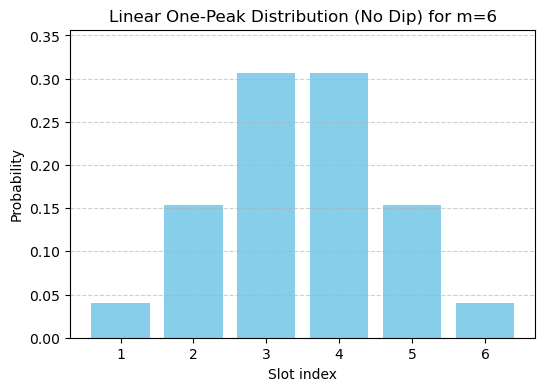

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Corrected linear one-peak (no dip) numeric function
def linear_one_peak_array_no_dip(m, fringe_prob=0.04):
    if m == 1:
        return np.array([1.0])
    elif m == 2:
        return np.array([0.04, 0.04])
    probs = np.zeros(m)
    probs[0] = probs[-1] = fringe_prob
    n = m - 2
    remaining = 1 - 2 * fringe_prob

    if n % 2 == 1:
        # Odd middle slots → single center
        peak_idx = n // 2
        half_weights = np.arange(1, peak_idx + 2)
        full_weights = np.concatenate([half_weights[:-1], half_weights[::-1]])
    else:
        # Even middle slots → twin centers
        half = n // 2
        half_weights = np.arange(1, half + 1)
        full_weights = np.concatenate([half_weights, half_weights[::-1]])

    # Scale to remaining probability and enforce no dips
    full_probs = full_weights / full_weights.sum() * remaining
    full_probs = np.maximum(full_probs, fringe_prob)
    full_probs *= remaining / full_probs.sum()

    probs[1:-1] = full_probs
    return probs

# --- Plot ---
m = 6  # change m as needed
slots = np.arange(1, m + 1)
linear_probs = linear_one_peak_array_no_dip(m)

plt.figure(figsize=(6, 4))
plt.bar(slots, linear_probs, color='skyblue')
plt.xlabel("Slot index")
plt.ylabel("Probability")
plt.title(f"Linear One-Peak Distribution (No Dip) for m={m}")
plt.xticks(slots)
plt.ylim(0, max(linear_probs) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()